## Observations and Insights 

In [ ]:
# Observations and insights

# The initial count of 1,893 measurements in the study was reduced by 5 due to the elimination one mouse (ID # g989) with missing data.
# the Summary Statistics table revealed the following regarding the drug regimen affect on tumor size:
# 1) Ramicane had the lowest mean at 40.216745, while Ketapril had the highest at 55.235638.
# 2) Ramicane had the lowest standard deviation at 4.846308, while Ketapril had the highest at 8.279709.
# The ratio of male to female mice was fairly even at 50.7% and 49.3%
# Capomulin, Ramicane, Infubinol, and Ceftamin were measured for outliers in the data regarding the final tumor volume by drug.
# Only one statistical outlier was observed.

In [35]:
%matplotlib notebook

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
from collections import Counter
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [37]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [38]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [39]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice.
mouse_count_df = len(merge_df)
mouse_count_df
#print(mouse_count_df.duplicated())

1893

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Creating a DataFrame object
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate_mouse = pd.DataFrame(merge_df, columns = ['Mouse ID', 'Timepoint'])
duplicate = duplicate_mouse[duplicate_mouse.duplicated(keep = 'first')]
print("Duplicate Rows :")
duplicate.head()

Duplicate Rows :


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_Mouse_data_df = pd.DataFrame(merge_df, columns = ['Mouse ID', 'Drug Regimen', 'Sex', 'Agee_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
duplicate_mouse = Dup_Mouse_data_df[Dup_Mouse_data_df.duplicated()]
print("Duplicate Mouse :")
duplicate_mouse.head(5)

Duplicate Mouse :


,Mouse ID,Drug Regimen,Sex,Agee_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,NaN,26,0,45.0,0


In [43]:
#Drop duplicates
merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
len(clean_merge_df)

1888

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Mean
Mean_clean=clean_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
Mean_clean
mean_clean_df=Mean_clean.rename(columns={"Tumor Volume (mm3)":"Mean"})
mean_clean_df

,Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [47]:
# Median
Median_clean=clean_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
Median_clean
Median_clean_df=Median_clean.rename(columns={"Tumor Volume (mm3)":"Median"})
Median_clean_df

,Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [48]:
# Variance
var_clean=clean_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
var_clean
Variance_clean_df=var_clean.rename(columns={"Tumor Volume (mm3)":"Variance"})
Variance_clean_df

,Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [49]:
# Standard Deviation
std_clean_df=clean_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
std_clean_df
Standard_Deviation_clean_df=std_clean_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
Standard_Deviation_clean_df

,Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [50]:
# sem
sem_clean_df=clean_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
sem_clean_df
SEM_clean_df=sem_clean_df.rename(columns={"Tumor Volume (mm3)":"SEM"})
SEM_clean_df

,SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [51]:
Merge_1=pd.merge(mean_clean_df, Median_clean_df, on="Drug Regimen", how="outer", indicator=False)
Merge_1

,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.393463,50.909965
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [52]:
Merge_2=pd.merge(Merge_1, Variance_clean_df, on="Drug Regimen", how="outer", indicator=False)
Merge_2

,Mean,Median,Variance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.393463,50.909965,43.138803
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [53]:
Merge_3=pd.merge(Merge_2, Standard_Deviation_clean_df, on="Drug Regimen", how="outer", indicator=False)
Merge_3

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [58]:
# Assemble the resulting series into a single summary dataframe.
Statistics_Summary_df=pd.merge(Merge_3, SEM_clean_df, on="Drug Regimen", how="outer", indicator=False)
Statistics_Summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# aggregate using a single line of code
agg_df = clean_merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})  
print(agg_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

<IPython.core.display.Javascript object>


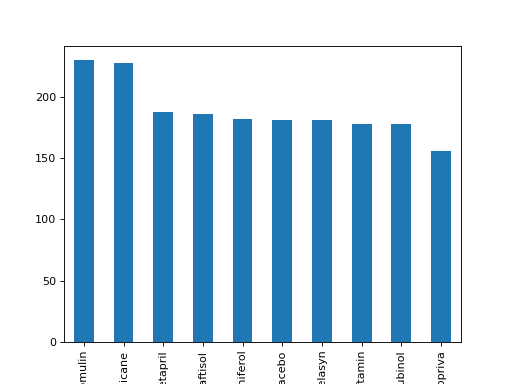

<function matplotlib.pyplot.show(*args, **kw)>

In [23]:
# Generate a bar plot showing the total number of
# measurements taken on each drug regimen using pandas.

drug_count = clean_merge_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xlabel("Total number of measurements per drug regimen")
plt.show


# Create a sample dataframe with an text index

#new_bar = pd.DataFrame({"Total measurements": [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]}, 
    #index=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

    # Plot a bar chart

#new_bar.plot(kind="bar")
#plt.xticks(rotation=30, horizontalalignment="right")
#plt.title("Total number of measurements per drug regimen")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Total measurements")
#plt.tight_layout()

<IPython.core.display.Javascript object>


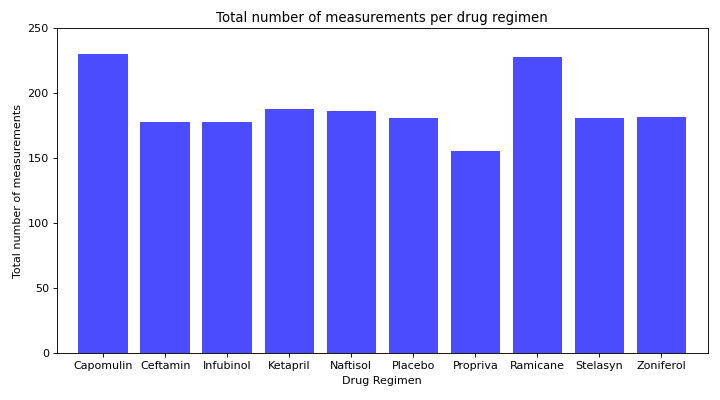

In [64]:
# Generate a bar plot showing the total number of measurements taken on 
#each drug regimen using pyplot.
plt.subplots(figsize=(9,5))
users = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(x_axis, users, color='blue', alpha=0.7, align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+20)
plt.title("Total number of measurements per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements")
plt.tight_layout()

<IPython.core.display.Javascript object>


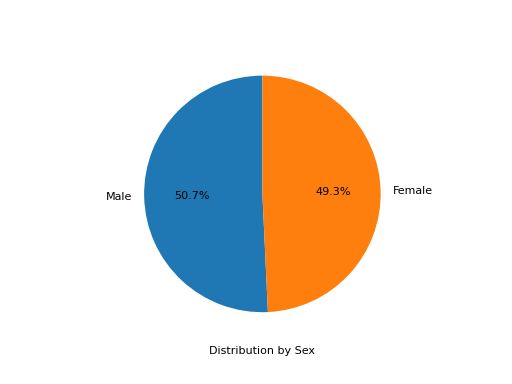

Text(0.5, 0, 'Distribution by Sex')

In [71]:
# Generate a pie plot showing the distribution of 
# female versus male mice using pandas

drug_count = clean_merge_df["Sex"].value_counts()
drug_count.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.xlabel('Distribution by Sex')

# Identify distribution of data by sex
# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
# Display resulting plot

<IPython.core.display.Javascript object>


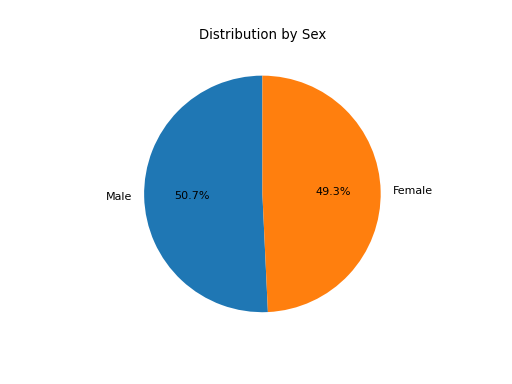

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = clean_merge_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [329]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_merge_df.groupby('Mouse ID')['Timepoint']
                                .max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint_df = pd.merge(clean_merge_df, max_timepoint_df, on='Mouse ID')
merged_timepoint_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [330]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []
for drug in drugs:
    
    temp_merged_df = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == drug]
    final_volume_df = temp_merged_df.loc[temp_merged_df['Timepoint'] == temp_merged_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
#Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
# Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')    
    
# Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


<IPython.core.display.Javascript object>


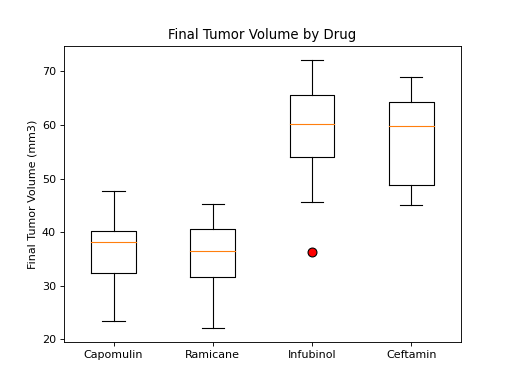

In [332]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

<IPython.core.display.Javascript object>


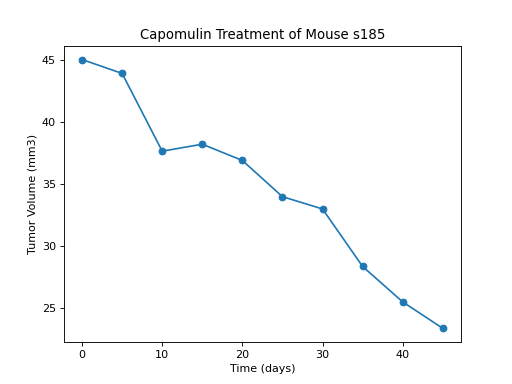

In [333]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
mouse = clean_merge_df.loc[clean_merge_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()   

## Line and Scatter Plots

<IPython.core.display.Javascript object>


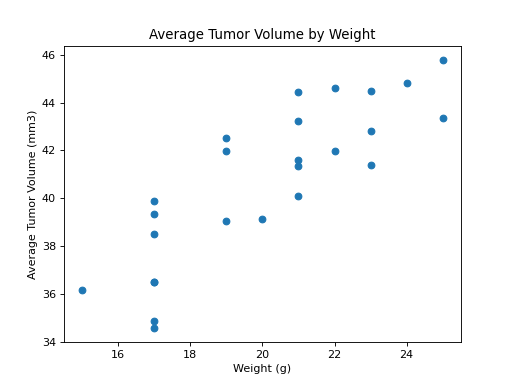

In [334]:
# # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_merge_df.loc[clean_merge_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()




## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


<IPython.core.display.Javascript object>


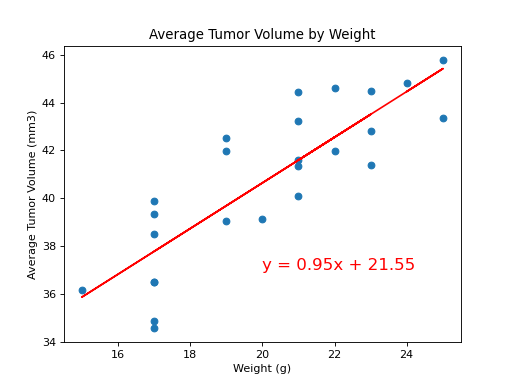

In [335]:
capomulin_df = clean_merge_df.loc[clean_merge_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()